In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

# My data points on ROC plot -- pointless exercise?

In [13]:
pklname = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/confusion_matrices_all_detectors_rawnums.pkl'
with open(pklname, 'rb') as pkl:
    results = pickle.load(pkl)

In [14]:
dets = ['nuc29', 'act32', 'act7/12', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
rxtrs = ['pwr', 'bwr', 'phwr']
totals = [120960, 322560, 6720]
ens = ['auto', 'short', 'long']
algs = ['knn', 'dtree', 'mll']

In [19]:
idcol = []
rcol = []
fpcol = []
tpcol = []
for det in dets:
    for enlist in ens:
        for i, alg in enumerate(algs):
            cm = results[det][enlist][i]
            FP = cm.sum(axis=0) - np.diag(cm)
            TP = np.diag(cm)  
            for j, rxtr in enumerate(rxtrs):
                idcol.append(det + '_' + enlist + '_' + alg)
                rcol.append(rxtr)
                fpcol.append(FP[j]/np.sum(totals[:j] + totals[j+1:]))
                tpcol.append(TP[j]/totals[j])
df = pd.DataFrame()
df['ID'] = idcol
df['RType'] = rcol
df['FP'] = fpcol
df['TP'] = tpcol

In [20]:
df.loc[df['RType']=='bwr'].describe()

,FP,TP
count,81.000000,81.000000
mean,0.151088,0.941841
std,0.110129,0.042318
min,0.002545,0.801900
25%,0.017481,0.911062
50%,0.165977,0.933470
75%,0.242325,0.991326
max,0.439168,0.999070


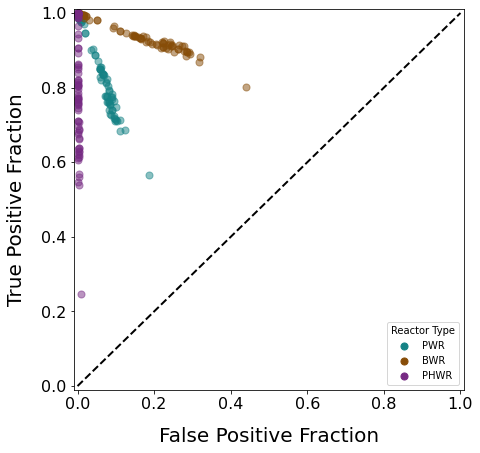

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_ylabel('True Positive Fraction', fontsize=20, labelpad=15)
ax.set_xlabel('False Positive Fraction', fontsize=20, labelpad=15)
rxtrs = ['pwr', 'bwr', 'phwr']
lbls = ['PWR', 'BWR', 'PHWR']
cdict = {'pwr' : colors['MTeal'], 
         'bwr' : colors['MBrwn'], 
         'phwr' : colors['MPurp']}
for i, rxtr in enumerate(rxtrs):
    sub = df.loc[df['RType'] == rxtr]
    ax.scatter(sub['FP'], sub['TP'], c = cdict[rxtr], s = 50, alpha = 0.5, label=lbls[i])
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.tick_params(labelsize=16)
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.01, 1.01)

leg = ax.legend(loc='best', title='Reactor Type')
for lh in leg.legendHandles: lh.set_alpha(1)


## Real ROC Curve 
(i.e. cross_val_predict returning probabilities instead of predictions, and the threshold of probability for prediction of a class is changed to get the curve)

In [6]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'
pklname = rdrive + 'roc_nuc29_err10.pkl'
with open(pklname, 'rb') as pkl:
    results = pickle.load(pkl)

In [7]:
fpr_knn = results[0]
tpr_knn = results[1]
auc_knn = results[2]
fpr_dtr = results[3]
tpr_dtr = results[4]
auc_dtr = results[5]

In [10]:
rxtrs = ['bwr', 'phwr', 'pwr']
n_classes=3

In [37]:
y_bin = label_binarize(y, classes=rxtrs)
y_bin

In [11]:
def plot_roc(fpr, tpr, auc, alg):
    color = ['Brwn', 'Purp', 'Teal']
    for i, c in zip(range(n_classes), color):
        plt.plot(fpr[i], tpr[i], lw=2, color=colors['M'+c],
                 label='ROC, {0} (AUC = {1:0.2f})'.format(rxtrs[i], auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for {}'.format(alg))
    plt.legend(loc="lower right")
    plt.show()
    return

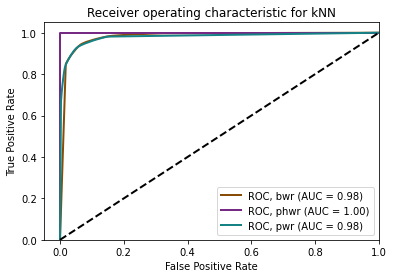

In [12]:
plot_roc(fpr_knn, tpr_knn, auc_knn, 'kNN')

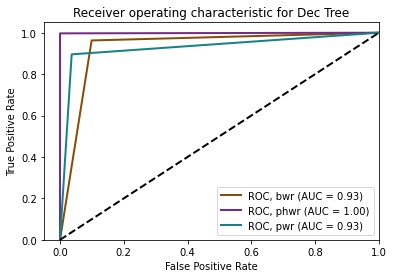

In [13]:
plot_roc(fpr_dtr, tpr_dtr, auc_dtr, 'Dec Tree')

In [21]:
#len(fpr_knn[2])
fpr_knn

{0: array([0.        , 0.01767701, 0.01767701, ..., 0.32113878, 0.32128759,
        1.        ]),
 1: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.70562771e-05,
        1.00000000e+00]),
 2: array([0.        , 0.00265731, 0.00265731, ..., 0.15020347, 0.15023992,
        1.        ])}